# Sistem Rekomendasi Tempat Wisata Indonesia

In [1]:
!pip install numpy==1.26.4
!pip install -U surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 38.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 7.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2463291 sha256=97bbad83b5bfe118bcf4c552b6a874b83f970565c61943921bb1440bf5c468e2
  Stored in directory: /root/

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split as surprise_train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. DATA UNDERSTANDING

In [2]:
# Load dataset
df = pd.read_csv('tempat_wisata_indonesia.csv')

print("\n1. INFORMASI DATASET")
print("-" * 40)
print(f"Jumlah data: {len(df)} tempat wisata")
print(f"Jumlah kolom: {len(df.columns)} kolom")
print(f"Ukuran dataset: {df.shape}")


1. INFORMASI DATASET
----------------------------------------
Jumlah data: 1169 tempat wisata
Jumlah kolom: 11 kolom
Ukuran dataset: (1169, 11)


In [3]:
print("\n2. INFORMASI KOLOM:")
print("-" * 40)
print(df.info())


2. INFORMASI KOLOM:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1169 non-null   int64  
 1   nama           1169 non-null   object 
 2   alamat         1167 non-null   object 
 3   rating         1168 non-null   float64
 4   jumlah_review  1168 non-null   float64
 5   deskripsi      1169 non-null   object 
 6   koordinat      1169 non-null   object 
 7   url            1169 non-null   object 
 8   provinsi       1169 non-null   object 
 9   foto           1169 non-null   object 
 10  kategori       1169 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 100.6+ KB
None


In [4]:
print("\n3. STATISTIK DESKRIPTIF:")
print("-" * 40)
print(df.describe())


3. STATISTIK DESKRIPTIF:
----------------------------------------
                id       rating  jumlah_review
count  1169.000000  1168.000000    1168.000000
mean    585.000000     4.425771     184.605316
std     337.605539     0.236611     240.617856
min       1.000000     3.000000       1.000000
25%     293.000000     4.300000       7.997000
50%     585.000000     4.400000      77.000000
75%     877.000000     4.600000     262.250000
max    1169.000000     5.000000     999.000000


In [5]:
print("\n4. SAMPLE DATA:")
print("-" * 40)
print(df.head())


4. SAMPLE DATA:
----------------------------------------
   id                           nama                               alamat  \
0   1          Pantai Tebing Lampuuk         Meunasah Balee, Kec. Lhoknga   
1   2                  Pantai Sawang          Sawang, Kec. Samudera, Aceh   
2   3  Nol Kilometer Kota Banda Aceh  Gampong Pande, Kec. Kuta Raja, Aceh   
3   4              Pantai Ulee Lheue       Ulee Lheue, Kec. Meuraxa, Aceh   
4   5           Pantai Ujong Kareung                                  NaN   

   rating  jumlah_review                                          deskripsi  \
0     4.6          758.0  Pantai Tebing Lampuuk, yang terletak di Kec. L...   
1     3.6           31.0  Pantai Sawang atau yang dikenal juga dengan na...   
2     4.4          661.0  Tugu Nol Kilometer Kota Banda Aceh adalah sebu...   
3     4.5          625.0  Pantai Ulee Lheue di Banda Aceh adalah tempat ...   
4     4.3          654.0  Pantai Ujong Kareung, yang sering disebut Pant...   

    

In [6]:
print("\n5. KOLOM YANG TERSEDIA:")
print("-" * 40)
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")


5. KOLOM YANG TERSEDIA:
----------------------------------------
1. id
2. nama
3. alamat
4. rating
5. jumlah_review
6. deskripsi
7. koordinat
8. url
9. provinsi
10. foto
11. kategori


# 2. UNIVARIATE EXPLORATORY DATA ANALYSIS

In [7]:
# Check missing values
print("\n1. MISSING VALUES:")
print("-" * 40)
missing_values = df.isnull().sum()
print(missing_values)


1. MISSING VALUES:
----------------------------------------
id               0
nama             0
alamat           2
rating           1
jumlah_review    1
deskripsi        0
koordinat        0
url              0
provinsi         0
foto             0
kategori         0
dtype: int64


In [8]:
# Check data types
print("\n2. TIPE DATA:")
print("-" * 40)
print(df.dtypes)


2. TIPE DATA:
----------------------------------------
id                 int64
nama              object
alamat            object
rating           float64
jumlah_review    float64
deskripsi         object
koordinat         object
url               object
provinsi          object
foto              object
kategori          object
dtype: object


In [9]:
# Analyze rating distribution
print("\n3. DISTRIBUSI RATING:")
print("-" * 40)
print(df['rating'].describe())


3. DISTRIBUSI RATING:
----------------------------------------
count    1168.000000
mean        4.425771
std         0.236611
min         3.000000
25%         4.300000
50%         4.400000
75%         4.600000
max         5.000000
Name: rating, dtype: float64


In [10]:
# Analyze review count
print("\n4. DISTRIBUSI JUMLAH REVIEW:")
print("-" * 40)
print(df['jumlah_review'].describe())


4. DISTRIBUSI JUMLAH REVIEW:
----------------------------------------
count    1168.000000
mean      184.605316
std       240.617856
min         1.000000
25%         7.997000
50%        77.000000
75%       262.250000
max       999.000000
Name: jumlah_review, dtype: float64


In [11]:
# Analyze provinces
print("\n5. DISTRIBUSI PROVINSI:")
print("-" * 40)
print(df['provinsi'].value_counts())


5. DISTRIBUSI PROVINSI:
----------------------------------------
provinsi
Aceh                   35
Kepulauan Riau         35
Sumatera Selatan       35
Sumatera Barat         35
Sulawesi Utara         35
Sulawesi Tenggara      35
Sulawesi Tengah        35
Sulawesi Selatan       35
Sulawesi Barat         35
Riau                   35
Papua                  35
Nusa Tenggara Timur    35
Nusa Tenggara Barat    35
Maluku Utara           35
Maluku                 35
Bali                   35
lampung                35
Kalimantan Utara       35
Kalimantan Timur       35
Bangka Belitung        35
banten                 35
Bengkulu               35
DKI jakarta            35
Gorontalo              35
Jambi                  35
jawa barat             35
Sumatera Utara         35
jawa tengah            35
Jawa Timur             35
Kalimantan Barat       35
Kalimantan Selatan     35
Papua Barat            34
Kalimantan Tengah      32
di yogyakarta          11
Papua Selatan           3
Papua Pegununga

In [12]:
# Analyze categories
print("\n6. DISTRIBUSI KATEGORI:")
print("-" * 40)
kategori_counts = df['kategori'].str.strip("[]'").str.split("', '").explode().value_counts()
print(kategori_counts)


6. DISTRIBUSI KATEGORI:
----------------------------------------
kategori
lainnya           328
pantai            232
taman             179
gunung            155
air_terjun        131
wisata_alam       108
danau              74
pulau              51
situs_sejarah      31
goa                27
candi              17
taman_nasional     17
benteng            16
museum             13
taman_rekreasi      8
lapangan            6
taman_hutan         6
pasar               5
rumah_adat          2
makam               1
Name: count, dtype: int64


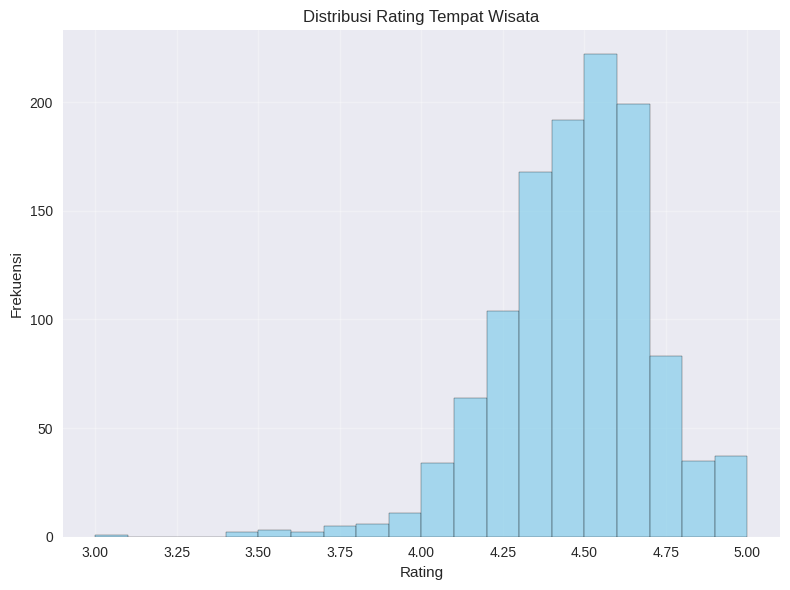

In [13]:
# 1. Rating distribution
plt.figure(figsize=(8, 6))
plt.hist(df['rating'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribusi Rating Tempat Wisata')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('images/rating_distribution.png')
plt.show()

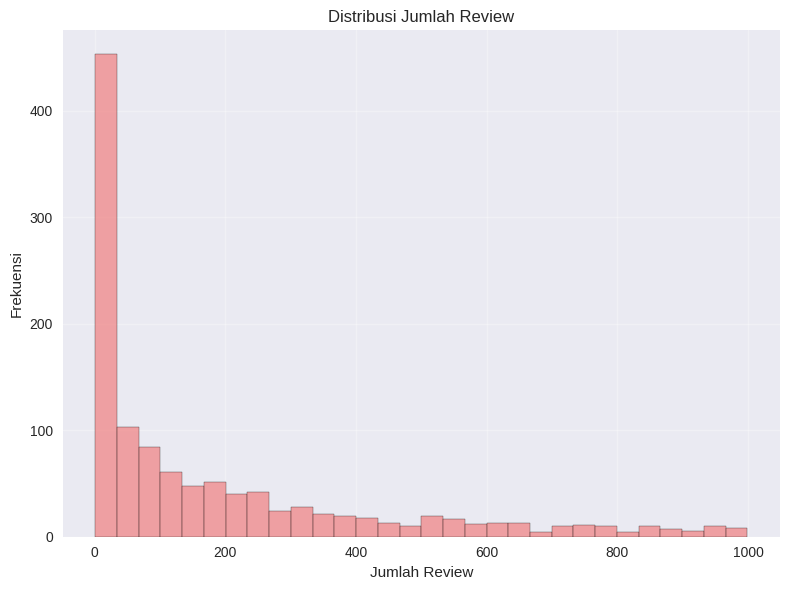

In [14]:
# 2. Review count distribution
plt.figure(figsize=(8, 6))
plt.hist(df['jumlah_review'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Distribusi Jumlah Review')
plt.xlabel('Jumlah Review')
plt.ylabel('Frekuensi')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('images/review_count_distribution.png')
plt.show()

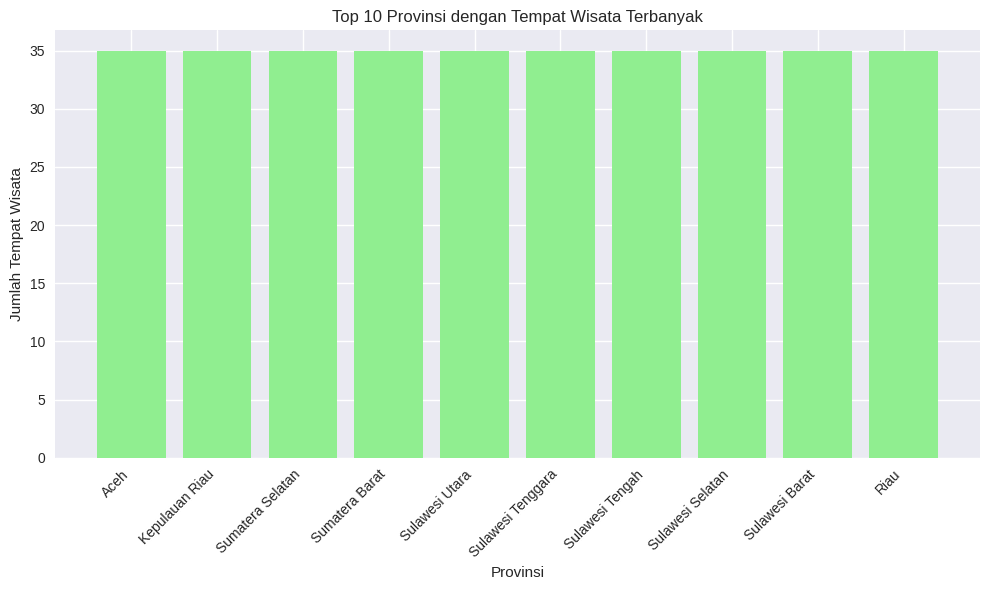

In [15]:
# 3. Top provinces
top_provinces = df['provinsi'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_provinces.index, top_provinces.values, color='lightgreen')
plt.title('Top 10 Provinsi dengan Tempat Wisata Terbanyak')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Tempat Wisata')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('images/province_distribution.png')
plt.show()

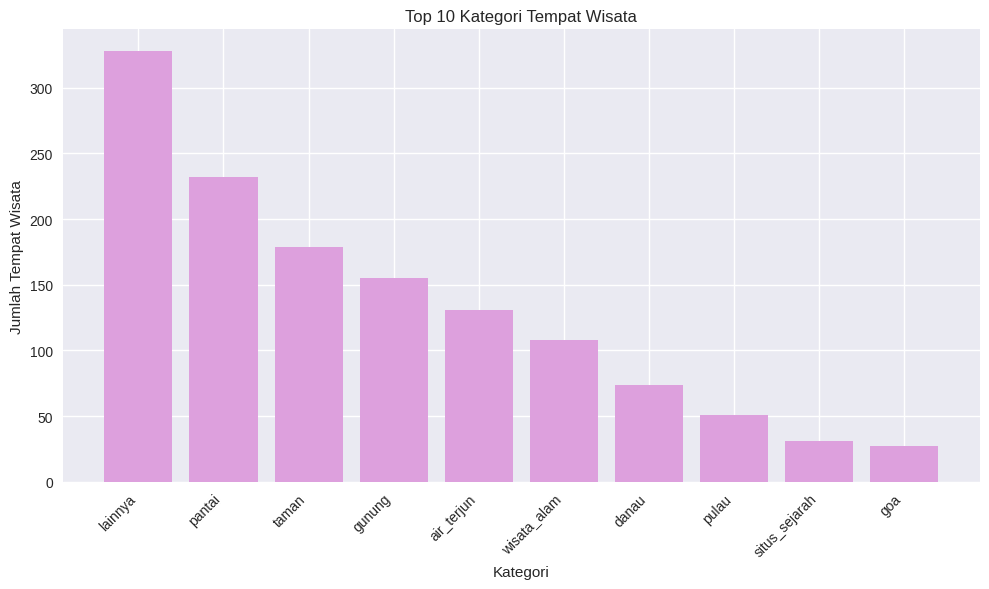

In [16]:
# 4. Category distribution
kategori_clean = df['kategori'].str.strip("[]'").str.split("', '").explode()
top_categories = kategori_clean.value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_categories.index, top_categories.values, color='plum')
plt.title('Top 10 Kategori Tempat Wisata')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Tempat Wisata')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('images/category_distribution.png')
plt.show()

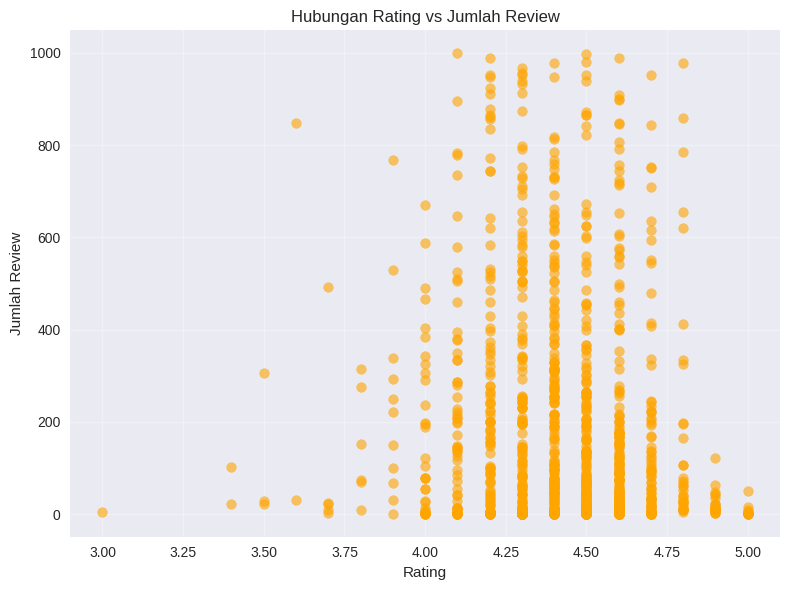

In [17]:
# 5. Rating vs Review Count scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['rating'], df['jumlah_review'], alpha=0.6, color='orange')
plt.title('Hubungan Rating vs Jumlah Review')
plt.xlabel('Rating')
plt.ylabel('Jumlah Review')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('images/rating_vs_review.png')
plt.show()

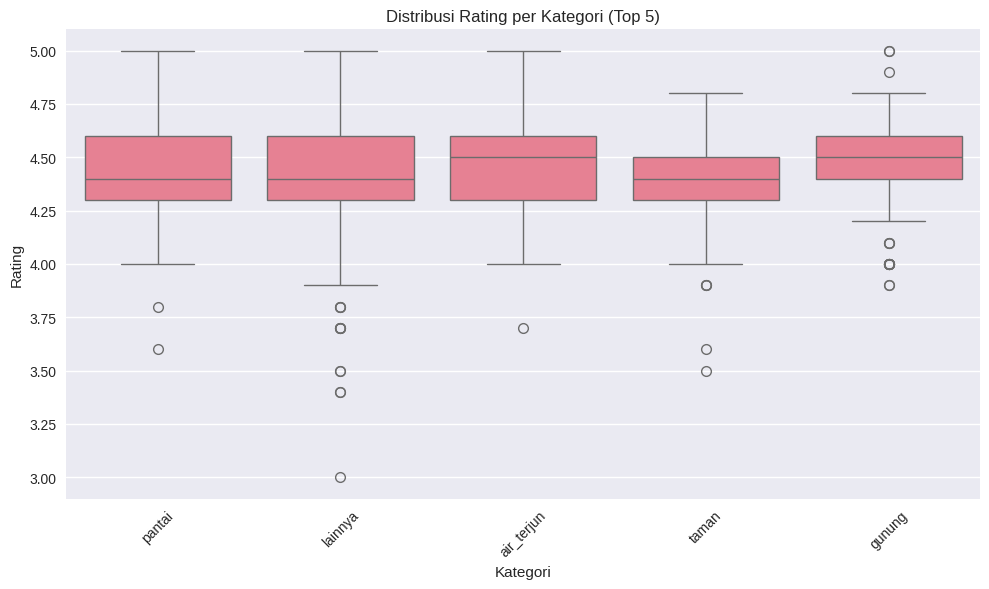

In [18]:
# 6. Boxplot Rating by Category
kategori_expanded = []
ratings_expanded = []
for idx, row in df.iterrows():
    categories = row['kategori'].strip("[]'").split("', '")
    for cat in categories:
        kategori_expanded.append(cat.strip())
        ratings_expanded.append(row['rating'])

category_rating_df = pd.DataFrame({
    'kategori': kategori_expanded,
    'rating': ratings_expanded
})
top_cats = category_rating_df['kategori'].value_counts().head(5).index
filtered_df = category_rating_df[category_rating_df['kategori'].isin(top_cats)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='kategori', y='rating')
plt.title('Distribusi Rating per Kategori (Top 5)')
plt.xlabel('Kategori')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/rating_by_category.png')
plt.show()

# 3. DATA PREPROCESSING

In [19]:
# Membuat copy dataset untuk preprocessing
df_processed = df.copy()

print("\n1. MEMBERSIHKAN DATA KATEGORI")
print("-" * 40)

# Clean and process categories
def clean_categories(cat_str):
    """Clean category string and return list of categories"""
    if pd.isna(cat_str):
        return ['lainnya']
    # Remove brackets and quotes, split by comma
    cleaned = cat_str.strip("[]'\"").replace("'", "").replace('"', '')
    categories = [cat.strip() for cat in cleaned.split(',')]
    return categories if categories[0] else ['lainnya']

df_processed['kategori_clean'] = df_processed['kategori'].apply(clean_categories)

# Create main category (first category for each place)
df_processed['kategori_utama'] = df_processed['kategori_clean'].apply(lambda x: x[0])

print("Kategori utama setelah pembersihan:")
print(df_processed['kategori_utama'].value_counts())


1. MEMBERSIHKAN DATA KATEGORI
----------------------------------------
Kategori utama setelah pembersihan:
kategori_utama
lainnya           328
pantai            232
gunung            147
taman             140
air_terjun        114
danau              65
wisata_alam        37
pulau              27
situs_sejarah      22
goa                22
museum             10
benteng            10
candi               9
pasar               3
lapangan            1
makam               1
taman_rekreasi      1
Name: count, dtype: int64


In [20]:
print("\n2. MENANGANI MISSING VALUES")
print("-" * 40)

# Handle missing values
print("Missing values sebelum cleaning:")
print(df_processed.isnull().sum())

# Drop rows dengan missing values pada kolom penting
df_processed = df_processed.dropna(subset=['alamat', 'rating', 'jumlah_review'])

print("\nMissing values setelah cleaning:")
print(df_processed.isnull().sum())


2. MENANGANI MISSING VALUES
----------------------------------------
Missing values sebelum cleaning:
id                0
nama              0
alamat            2
rating            1
jumlah_review     1
deskripsi         0
koordinat         0
url               0
provinsi          0
foto              0
kategori          0
kategori_clean    0
kategori_utama    0
dtype: int64

Missing values setelah cleaning:
id                0
nama              0
alamat            0
rating            0
jumlah_review     0
deskripsi         0
koordinat         0
url               0
provinsi          0
foto              0
kategori          0
kategori_clean    0
kategori_utama    0
dtype: int64


In [21]:
print("\n3. FEATURE ENGINEERING")
print("-" * 40)

# Create popularity score based on rating and review count
# Normalize review count to 0-5 scale to match rating scale
review_max = df_processed['jumlah_review'].max()
df_processed['review_normalized'] = (df_processed['jumlah_review'] / review_max) * 5

# Calculate popularity score (weighted average of rating and normalized reviews)
df_processed['popularity_score'] = (0.7 * df_processed['rating']) + (0.3 * df_processed['review_normalized'])

print("Popularity score statistics:")
print(df_processed['popularity_score'].describe())

# Create content for content-based filtering
df_processed['content'] = (
    df_processed['nama'] + ' ' +
    df_processed['alamat'] + ' ' +
    df_processed['deskripsi'] + ' ' +
    df_processed['provinsi'] + ' ' +
    df_processed['kategori_utama']
)


3. FEATURE ENGINEERING
----------------------------------------
Popularity score statistics:
count    1167.000000
mean        3.374696
std         0.379707
min         2.107508
25%         3.152006
50%         3.289069
75%         3.504505
max         4.828468
Name: popularity_score, dtype: float64


In [22]:
print("\n4. DATA SETELAH PREPROCESSING")
print("-" * 40)
print(f"Jumlah data: {len(df_processed)}")
print(f"Kolom baru yang ditambahkan: kategori_clean, kategori_utama, popularity_score, content")


4. DATA SETELAH PREPROCESSING
----------------------------------------
Jumlah data: 1167
Kolom baru yang ditambahkan: kategori_clean, kategori_utama, popularity_score, content


# 4. DATA PREPARATION

In [23]:
print("\n1. PERSIAPAN DATA UNTUK CONTENT-BASED FILTERING")
print("-" * 40)

# Prepare data for content-based filtering
# Create TF-IDF matrix for content
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,
    stop_words='english',
    ngram_range=(1, 2),
    min_df=1
)

# Fit and transform the content
tfidf_matrix = tfidf_vectorizer.fit_transform(df_processed['content'])
print(f"TF-IDF Matrix shape: {tfidf_matrix.shape}")

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)
print(f"Cosine Similarity Matrix shape: {cosine_sim.shape}")


1. PERSIAPAN DATA UNTUK CONTENT-BASED FILTERING
----------------------------------------
TF-IDF Matrix shape: (1167, 1000)
Cosine Similarity Matrix shape: (1167, 1167)


In [24]:
print("\n2. PERSIAPAN DATA UNTUK COLLABORATIVE FILTERING")
print("-" * 40)

# For collaborative filtering, we'll simulate user ratings
# Since we don't have actual user data, we'll create synthetic user-item interactions
np.random.seed(42)

# Create synthetic users and their ratings
n_users = 100
n_places = len(df_processed)

# Create user-item rating matrix
user_ids = []
place_ids = []
ratings = []

for user_id in range(1, n_users + 1):
    # Each user rates 10-30 places randomly
    n_ratings = np.random.randint(10, 31)
    rated_places = np.random.choice(df_processed.index, n_ratings, replace=False)

    for place_idx in rated_places:
        user_ids.append(user_id)
        place_ids.append(place_idx)
        # Rating influenced by actual place rating with some noise
        base_rating = df_processed.loc[place_idx, 'rating']
        synthetic_rating = np.clip(base_rating + np.random.normal(0, 0.5), 1, 5)
        ratings.append(round(synthetic_rating, 1))

# Create ratings dataframe
ratings_df = pd.DataFrame({
    'user_id': user_ids,
    'place_id': place_ids,
    'rating': ratings
})

print(f"Synthetic ratings dataset: {len(ratings_df)} ratings")
print(f"Unique users: {ratings_df['user_id'].nunique()}")
print(f"Unique places: {ratings_df['place_id'].nunique()}")
print(f"Rating distribution:")
print(ratings_df['rating'].value_counts().sort_index())


2. PERSIAPAN DATA UNTUK COLLABORATIVE FILTERING
----------------------------------------
Synthetic ratings dataset: 2039 ratings
Unique users: 100
Unique places: 952
Rating distribution:
rating
1.9      1
2.3      1
2.6      1
2.7      2
2.8      2
2.9      7
3.0      4
3.1      9
3.2      7
3.3     17
3.4     23
3.5     37
3.6     47
3.7     67
3.8     90
3.9     91
4.0    129
4.1    125
4.2    137
4.3    138
4.4    123
4.5    146
4.6    160
4.7    134
4.8     93
4.9    117
5.0    331
Name: count, dtype: int64


In [25]:
# Prepare data for Surprise library
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(ratings_df[['user_id', 'place_id', 'rating']], reader)

print("\n3. SPLITTING DATA")
print("-" * 40)

# Split data for collaborative filtering
trainset, testset = surprise_train_test_split(surprise_data, test_size=0.2, random_state=42)
print(f"Training set: {trainset.n_ratings} ratings")
print(f"Test set: {len(testset)} ratings")


3. SPLITTING DATA
----------------------------------------
Training set: 1631 ratings
Test set: 408 ratings


# 5. MODEL DEVELOPMENT - CONTENT BASED FILTERING

In [37]:
print("\n\n" + "="*60)
print("CONTENT-BASED FILTERING MODEL")
print("="*60)

def get_content_recommendations(place_name, cosine_sim=cosine_sim, df=df_processed, top_n=10):
    """
    Get recommendations based on content similarity
    """
    # Find the index of the place
    try:
        idx = df[df['nama'].str.lower() == place_name.lower()].index[0]
    except IndexError:
        print(f"Place '{place_name}' not found!")
        return None

    # Get similarity scores for all places
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort places by similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top N similar places (excluding the place itself)
    sim_scores = sim_scores[1:top_n+1]

    # Get place indices
    place_indices = [i[0] for i in sim_scores]

    # Return recommended places
    recommendations = df.iloc[place_indices][['nama', 'alamat', 'rating', 'jumlah_review', 'kategori_utama', 'provinsi']].copy()
    recommendations['similarity_score'] = [score[1] for score in sim_scores]

    return recommendations



CONTENT-BASED FILTERING MODEL


In [38]:
print("\n1. TESTING CONTENT-BASED FILTERING")
print("-" * 40)

# Test with first place in dataset
test_place = df_processed.iloc[0]['nama']
print(f"Mencari rekomendasi untuk: {test_place}")

content_recommendations = get_content_recommendations(test_place, top_n=5)
if content_recommendations is not None:
    print("\nTop 5 Rekomendasi (Content-Based):")
    print("-" * 40)
    for idx, row in content_recommendations.iterrows():
        print(f"{row['nama']}")
        print(f"  Lokasi: {row['alamat']}, {row['provinsi']}")
        print(f"  Rating: {row['rating']}, Reviews: {row['jumlah_review']}")
        print(f"  Kategori: {row['kategori_utama']}")
        print(f"  Similarity: {row['similarity_score']:.3f}")
        print()


1. TESTING CONTENT-BASED FILTERING
----------------------------------------
Mencari rekomendasi untuk: Pantai Tebing Lampuuk

Top 5 Rekomendasi (Content-Based):
----------------------------------------
Pantai Paradiso Sabang
  Lokasi: Jl. Malahayati, Kuta Ateueh, Sukakarya, Aceh, Aceh
  Rating: 4.5, Reviews: 421.0
  Kategori: pantai
  Similarity: 0.482

Tebing Batu HATUPIA
  Lokasi: Sawai, Kec. Seram Utara, Maluku, Maluku
  Rating: 5.0, Reviews: 50.0
  Kategori: lainnya
  Similarity: 0.411

Pantai Sawang
  Lokasi: Sawang, Kec. Samudera, Aceh, Aceh
  Rating: 3.6, Reviews: 31.0
  Kategori: pantai
  Similarity: 0.408

Wisata Alam Lubuk Putih
  Lokasi: Seleman, Kec. Tj. Agung, Sumatera Selatan
  Rating: 4.2, Reviews: 148.0
  Kategori: wisata_alam
  Similarity: 0.389

Pantai Ulee Lheue
  Lokasi: Ulee Lheue, Kec. Meuraxa, Aceh, Aceh
  Rating: 4.5, Reviews: 625.0
  Kategori: pantai
  Similarity: 0.380



# 6. MODEL DEVELOPMENT - COLLABORATIVE FILTERING

In [39]:
print("\n\n" + "="*60)
print("COLLABORATIVE FILTERING MODEL")
print("="*60)

print("\n1. TRAINING SVD MODEL")
print("-" * 40)

# Train SVD model
svd_model = SVD(n_factors=50, n_epochs=20, random_state=42)
svd_model.fit(trainset)

print("SVD model trained successfully!")

def get_collaborative_recommendations(user_id, model=svd_model, df=df_processed, ratings_df=ratings_df, top_n=10):
    """
    Get recommendations for a user using collaborative filtering
    """
    # Get all places that user hasn't rated
    user_ratings = ratings_df[ratings_df['user_id'] == user_id]['place_id'].values
    all_place_ids = df.index.values
    unrated_places = [place_id for place_id in all_place_ids if place_id not in user_ratings]

    # Predict ratings for unrated places
    predictions = []
    for place_id in unrated_places:
        pred = model.predict(user_id, place_id)
        predictions.append((place_id, pred.est))

    # Sort by predicted rating
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Get top N recommendations
    top_predictions = predictions[:top_n]

    # Create recommendations dataframe
    rec_place_ids = [pred[0] for pred in top_predictions]
    rec_ratings = [pred[1] for pred in top_predictions]

    recommendations = df.iloc[rec_place_ids][['nama', 'alamat', 'rating', 'jumlah_review', 'kategori_utama', 'provinsi']].copy()
    recommendations['predicted_rating'] = rec_ratings

    return recommendations



COLLABORATIVE FILTERING MODEL

1. TRAINING SVD MODEL
----------------------------------------
SVD model trained successfully!


In [40]:
print("\n2. TESTING COLLABORATIVE FILTERING")
print("-" * 40)

# Test with a random user
test_user_id = np.random.choice(ratings_df['user_id'].unique())
print(f"Mencari rekomendasi untuk User ID: {test_user_id}")

# Show user's rating history
user_history = ratings_df[ratings_df['user_id'] == test_user_id].merge(
    df_processed[['nama', 'kategori_utama']], left_on='place_id', right_index=True
)
print(f"\nRiwayat rating user (sample 5):")
print(user_history[['nama', 'kategori_utama', 'rating']].head())

collaborative_recommendations = get_collaborative_recommendations(test_user_id, top_n=5)
print(f"\nTop 5 Rekomendasi (Collaborative Filtering):")
print("-" * 40)
for idx, row in collaborative_recommendations.iterrows():
    print(f"{row['nama']}")
    print(f"  Lokasi: {row['alamat']}, {row['provinsi']}")
    print(f"  Rating Aktual: {row['rating']}, Reviews: {row['jumlah_review']}")
    print(f"  Kategori: {row['kategori_utama']}")
    print(f"  Predicted Rating: {row['predicted_rating']:.2f}")
    print()


2. TESTING COLLABORATIVE FILTERING
----------------------------------------
Mencari rekomendasi untuk User ID: 81

Riwayat rating user (sample 5):
                                            nama kategori_utama  rating
1623                                 Bukit Tiung         gunung     3.7
1624                              Pantai Oluhuta         pantai     4.2
1625  Sunyie Lamo , Alun-alun Kesultanan Têrnaté        lainnya     5.0
1626                      Air Terjun Datar Lebar     air_terjun     4.4
1627    Pantai Melawai Kecamatan Balikpapan Kota         pantai     4.3

Top 5 Rekomendasi (Collaborative Filtering):
----------------------------------------
Air Terjun Takapala
  Lokasi: Bonto Lerung, Kec. Tinggimoncong, Sulawesi Selatan
  Rating Aktual: 4.5, Reviews: 1.973
  Kategori: air_terjun
  Predicted Rating: 4.78

Danau Belibis Tayan
  Lokasi: Sejotang, Kec. Tayan Hilir, Kalimantan Barat
  Rating Aktual: 4.3, Reviews: 257.0
  Kategori: danau
  Predicted Rating: 4.66

Air Terjun

# 7. EVALUATION

In [41]:
print("\n\n" + "="*60)
print("MODEL EVALUATION")
print("="*60)

print("\n1. COLLABORATIVE FILTERING EVALUATION")
print("-" * 40)

# Evaluate collaborative filtering model
predictions = svd_model.test(testset)

# Calculate RMSE and MAE
rmse = accuracy.rmse(predictions, verbose=False)
mae = accuracy.mae(predictions, verbose=False)

print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")



MODEL EVALUATION

1. COLLABORATIVE FILTERING EVALUATION
----------------------------------------
Root Mean Square Error (RMSE): 0.4965
Mean Absolute Error (MAE): 0.4118


In [42]:
print("\n2. CONTENT-BASED FILTERING EVALUATION")
print("-" * 40)

# For content-based filtering, we'll evaluate using diversity and coverage metrics
def evaluate_content_based_diversity(n_samples=20):
    """Evaluate diversity of content-based recommendations"""
    diversities = []

    # Sample random places for testing
    sample_places = df_processed.sample(n_samples)['nama'].values

    for place_name in sample_places:
        try:
            recs = get_content_recommendations(place_name, top_n=5)
            if recs is not None:
                # Calculate category diversity
                categories = recs['kategori_utama'].values
                unique_categories = len(set(categories))
                diversity = unique_categories / len(categories)
                diversities.append(diversity)
        except:
            continue

    return np.mean(diversities) if diversities else 0

diversity_score = evaluate_content_based_diversity()
print(f"Content-Based Diversity Score: {diversity_score:.4f}")
print("(Skor mendekati 1.0 menunjukkan rekomendasi yang beragam)")

# Coverage evaluation
def evaluate_coverage():
    """Evaluate how many items can be recommended"""
    recommendable_items = set()

    # Test with sample of places
    sample_places = df_processed.sample(min(50, len(df_processed)))['nama'].values

    for place_name in sample_places:
        try:
            recs = get_content_recommendations(place_name, top_n=10)
            if recs is not None:
                recommendable_items.update(recs.index.values)
        except:
            continue

    coverage = len(recommendable_items) / len(df_processed)
    return coverage

coverage_score = evaluate_coverage()
print(f"Content-Based Coverage Score: {coverage_score:.4f}")
print("(Skor mendekati 1.0 menunjukkan cakupan rekomendasi yang luas)")


2. CONTENT-BASED FILTERING EVALUATION
----------------------------------------
Content-Based Diversity Score: 0.5000
(Skor mendekati 1.0 menunjukkan rekomendasi yang beragam)
Content-Based Coverage Score: 0.3162
(Skor mendekati 1.0 menunjukkan cakupan rekomendasi yang luas)
